<a href="https://colab.research.google.com/github/MoritzLaurer/zeroshot-classifier/blob/main/2_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install and setup

In [ ]:
!pip install transformers[sentencepiece]~=4.33.0 -qqq
!pip install datasets~=2.14.0 -qqq
!pip install accelerate~=0.21.0 -qqq
# for automatic dataset cleaning
!pip install cleanlab~=2.4.0 -qqq
!pip install sentence-transformers~=2.2.2 -qqq

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.6/7.6 MB 60.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 295.0/295.0 kB 37.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 32.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 79.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 78.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 519.6/519.6 kB 8.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [ ]:
## load packages
import transformers
import torch

import pandas as pd
import numpy as np
import os
from datasets import load_dataset

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sentence_transformers import SentenceTransformer
from cleanlab.dataset import health_summary
from cleanlab.classification import CleanLearning
import warnings
from sklearn.exceptions import ConvergenceWarning
import time
import tqdm

from google.colab.data_table import DataTable
from google.colab import data_table
from IPython.display import display
data_table.enable_dataframe_formatter() # https://colab.research.google.com/notebooks/data_table.ipynb#scrollTo=JgBtx0xFFv_i

# set global seed for reproducibility and against seed hacking
SEED_GLOBAL = 42
np.random.seed(SEED_GLOBAL)

In [ ]:
## connect to google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

#set wd
print(os.getcwd())
os.chdir("/content/drive/My Drive/PhD/zero-shot-models")
print(os.getcwd())

Mounted at /content/drive
/content
/content/drive/My Drive/PhD/zero-shot-models


### Overarching functions

In [ ]:
# model for automatic cleaning
# choose model from MTEB leaderboard: https://huggingface.co/spaces/mteb/leaderboard
sbert_embedder = SentenceTransformer("BAAI/bge-base-en-v1.5")

In [ ]:
# overall dataset health statistics https://docs.cleanlab.ai/stable/cleanlab/dataset.html

def dataset_health_analysis(texts_encoded=None, df=None, random_state=42):
    model = LogisticRegression(max_iter=500, random_state=random_state)
    pred_probs = cross_val_predict(model, texts_encoded, df["label_standard"], cv=5, method="predict_proba")

    summary = health_summary(labels=df["label_standard"], pred_probs=pred_probs, verbose=False)

    # add label text to columns
    label_text_map_alphabetical = {i: label_text for i, label_text in enumerate(df.label_text.factorize(sort=True)[1])}
    summary["classes_by_label_quality"]["Class Text"] = summary["classes_by_label_quality"]["Class Index"].map(label_text_map_alphabetical)
    summary["overlapping_classes"]["Class Label A"] = summary["overlapping_classes"]["Class Index A"].map(label_text_map_alphabetical)
    summary["overlapping_classes"]["Class Label B"] = summary["overlapping_classes"]["Class Index B"].map(label_text_map_alphabetical)

    return summary


def cleanlab_cleaning(texts_encoded=None, df=None, random_state=42, label_quality_thresh=0.5, min_output_per_class=5, verbose=True):

    # find label issues
    model = LogisticRegression(max_iter=500, random_state=random_state)
    cl = CleanLearning(
        model, cv_n_folds=5,
        find_label_issues_kwargs={  # https://docs.cleanlab.ai/stable/cleanlab/filter.html#cleanlab.filter.find_label_issues
            "filter_by": "prune_by_noise_rate",
            "min_examples_per_class": min_output_per_class
        }
    )
    df_all_quality = cl.find_label_issues(
        X=texts_encoded, labels=df["label_standard"],  #train_labels,
    )

    # add text and label_text
    df_all_quality["text"] = df["text"].to_list()
    df_all_quality["given_label_text"] = df["label_text"].to_list()
    # add label_text for prediction
    # ! careful: this can lead to mismatches between df_all_quality and df in the numeric labels, if df's labels were not created with factorize
    label_text_map_alphabetical = {i: label_text for i, label_text in enumerate(df.label_text.factorize(sort=True)[1])}
    df_all_quality["predicted_label_text"] = df_all_quality.predicted_label.map(label_text_map_alphabetical)
    # remove unnecessary columns
    df_all_quality = df_all_quality.drop(["given_label", "predicted_label"], axis=1)

    ## cleaning decision
    # remove label issues identified with cleanlab find_label_issues method
    print("Total texts: ", len(df_all_quality))
    df_all_quality_to_remove_1 = df_all_quality[df_all_quality["is_label_issue"] == True]
    print("Issues identified via prune_by_noise_rate: ", len(df_all_quality_to_remove_1))
    # remove labels with low label quality, but keep at least N
    # Step 1: Sort the dataframe by quality and identify the top N for each class to keep at least N
    sorted_df = df_all_quality.sort_values(by=['given_label_text', 'label_quality'], ascending=[True, False])
    df_top_n_per_class = sorted_df.groupby('given_label_text').head(min_output_per_class)
    # Step 2: Filter out rows below the threshold
    df_low_quality = df_all_quality[df_all_quality.label_quality < label_quality_thresh]
    # Step 3: keep at least the top N for each class among low quality
    df_all_quality_to_remove_2 = df_low_quality[~df_low_quality.index.isin(df_top_n_per_class.index)]
    print("Issues identified via label quality: ", len(df_all_quality_to_remove_2))

    indices_to_remove = set(df_all_quality_to_remove_1.index.to_list() + df_all_quality_to_remove_2.index.to_list())
    print("Total texts to remove: ", len(indices_to_remove))
    print("Make sure to reset index of initial df so that indices_to_remove align with df.index")

    if verbose:
        # label imbalance analysis
        df_cl = df[~df.index.isin(indices_to_remove)]
        df_label_balance_change = pd.DataFrame({
            "label_distribution_original": df.label_text.value_counts(),
            "label_distribution_clean": df_cl.label_text.value_counts(),
        })
        display(df_label_balance_change)

        df_all_quality.label_quality.plot.hist(
            bins=10, xlabel="label quality", title="Label quality distribution"
        )

    return indices_to_remove, df_all_quality



### Automatic data cleaning

In [ ]:
import os

def find_train_files(directory):
    # List all files dataset directory
    all_files = [os.path.join(directory, f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    # Filter files that have the word "train" in the filename
    # only clean train datasets
    train_files = [f for f in all_files if "train" in os.path.basename(f)]
    return train_files

directory_path = './datasets_standardized'
train_files_lst = find_train_files(directory_path)
print(train_files_lst)

# remove specific datasets where automatic cleaning won't add value
datasets_no_automatic_clean = ["trueteacher", "anthropic_harmless", "anthropic_helpful"]
train_files_lst = [path for path in train_files_lst if not any(dataset in path for dataset in datasets_no_automatic_clean)]
print(train_files_lst)

['./datasets_standardized/ds_wellformedquery_train.gzip', './datasets_standardized/ds_rottentomatoes_train.gzip', './datasets_standardized/ds_amazonpolarity_train.gzip', './datasets_standardized/ds_imdb_train.gzip', './datasets_standardized/ds_yelpreviews_train.gzip', './datasets_standardized/ds_hatexplain_train.gzip', './datasets_standardized/ds_massive_train.gzip', './datasets_standardized/ds_banking77_train.gzip', './datasets_standardized/ds_emotiondair_train.gzip', './datasets_standardized/ds_emocontext_train.gzip', './datasets_standardized/ds_empathetic_train.gzip', './datasets_standardized/ds_agnews_train.gzip', './datasets_standardized/ds_yahootopics_train.gzip', './datasets_standardized/ds_biasframes_offensive_train.gzip', './datasets_standardized/ds_biasframes_sex_train.gzip', './datasets_standardized/ds_biasframes_intent_train.gzip', './datasets_standardized/ds_financialphrasebank_train.gzip', './datasets_standardized/ds_appreviews_train.gzip', './datasets_standardized/ds_hat

In [ ]:

def clean_dataset(dataset_path=None, max_input_per_class=10_000,
                  label_quality_thresh=0.5, min_output_per_class=10, max_output_per_class=1_000,
                  verbose=True, health_summary=False, embedding_batch_size=32):

    print("*** Dataset being cleaned ***")
    print(f"*** {dataset_path} ***\n")
    df = pd.read_parquet(dataset_path).reset_index(drop=True)

    # downsample for faster iterations
    df = df.groupby("label_text", as_index=False, group_keys=False).apply(
        lambda x: x.sample(min(max_input_per_class, len(x)), random_state=SEED_GLOBAL)
    ).reset_index(drop=True)

    # encode texts with sbert model
    # https://www.sbert.net/docs/package_reference/SentenceTransformer.html#sentence_transformers.SentenceTransformer.encode
    texts_encoded = sbert_embedder.encode(
        df["text"].to_list(),
        batch_size=embedding_batch_size, show_progress_bar=True, normalize_embeddings=False
    )

    #if not verbose:
    warnings.simplefilter('ignore', ConvergenceWarning)
    #else:
    #    warnings.simplefilter('default', ConvergenceWarning)

    # overall dataset health
    if health_summary:
        summary = dataset_health_analysis(texts_encoded=texts_encoded, df=df)
        display(summary["classes_by_label_quality"])
        display(summary["overlapping_classes"])

    indices_to_remove, df_all_quality = cleanlab_cleaning(
        texts_encoded=texts_encoded,
        df=df, random_state=SEED_GLOBAL,
        label_quality_thresh=label_quality_thresh, min_output_per_class=10,
        verbose=verbose
    )

    # add quality score to final dataset
    # adding index column to enable merging on them and eliminate risk of merging issues due to text duplicates or similar
    df["index"] = df.index
    df_all_quality["index"] = df_all_quality.index
    df = df.merge(df_all_quality[["label_quality", "text", "given_label_text", "index"]], left_on=["text", "label_text", "index"], right_on=["text", "given_label_text", "index"], how="left")
    df = df.drop(columns=["index", "given_label_text"]).reset_index(drop=True)
    df_all_quality = df_all_quality.drop(columns=["index"]).reset_index(drop=True)

    # remove noisy rows
    df_cl = df[~df.index.isin(indices_to_remove)]

    # downsample to account for imbalance
    df_cl = df_cl.groupby("label_text", as_index=False, group_keys=False).apply(
        lambda x: x.sample(min(max_output_per_class, len(x)), random_state=SEED_GLOBAL)
    )

    return df_cl, df_all_quality



Dataset iterations:   0%|          | 0/25 [00:00<?, ?it/s]

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_wellformedquery_train.gzip ***



Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Total texts:  16239
Issues identified via prune_by_noise_rate:  2595
Issues identified via label quality:  3993
Total texts to remove:  3993
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
well_formed                             8256                      6768
not_well_formed                         7983                      5478

text       label_text  \
5817                    Does steel conduct electrivity ?  not_well_formed   
9593     How much hp does the 2008 suzuki gsxr600 make ?      well_formed   
7354             Antifreeze leak on a 96 nissan altima ?  not_well_formed   
10195               What is 375 grams of sugar in cups ?      well_formed   
6807   What is the roles and fuction of the head nurse ?  not_well_formed   
8864                            What is the normal MCV ?      well_formed   
388             Who did Johann Sebastion Bach marry yo ?  not_well_formed   
15862         What is the sole purpose of fermentation ?      well_formed   
14444   Are there any fun and free websites for tweens ?      well_formed   
8456    What did Robert Owen do to change factory life ?      well_formed   

       label_standard  label_quality  
5817                0       0.543258  
9593                1       0.698949  
7354                0       0.694749  
10195               1       0.598093  
6807                0       0.527441  
8864                1       0.520641  
388                 0       0.773054  
15862               1       0.557321  
14444               1       0.772862  
8456                1       0.821792

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_rottentomatoes_train.gzip ***



Batches:   0%|          | 0/38 [00:00<?, ?it/s]

Total texts:  9596
Issues identified via prune_by_noise_rate:  594
Issues identified via label quality:  1365
Total texts to remove:  1365
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
negative                         4798                      4097
positive                         4798                      4134

text label_text  \
46    it's not the worst comedy of the year , but it...   negative   
2005  if ever a concept came handed down from the mo...   negative   
8009                      daring and beautifully made .   positive   
221   literally nothing in the pool is new , but if ...   negative   
2025  as david letterman and the onion have proven ,...   negative   
1059                a horrible , 99-minute stink bomb .   negative   
2051  this is the sort of low-grade dreck that usual...   negative   
3657  there's suspension of disbelief and then there...   negative   
7946  these are lives worth watching , paths worth f...   positive   
4139  the jokes are sophomoric , stereotypes are spr...   negative   

      label_standard  label_quality  
46                 0       0.897797  
2005               0       0.739702  
8009               1       0.947604  
221                0       0.918465  
2025               0       0.756084  
1059               0       0.962105  
2051               0       0.983790  
3657               0       0.970243  
7946               1       0.969235  
4139               0       0.976985

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_amazonpolarity_train.gzip ***



Batches:   0%|          | 0/79 [00:00<?, ?it/s]

Total texts:  20000
Issues identified via prune_by_noise_rate:  204
Issues identified via label quality:  901
Total texts to remove:  901
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
negative                        10000                      9559
positive                        10000                      9540

text label_text  \
11199  Excellent\nI knew nothing about the internet b...   positive   
525    Lied in description.\nlied about how long the ...   negative   
13177  Very Very Very Addicting\nOne of the best game...   positive   
7678   Useless\nI needed some inexpensive locks to se...   negative   
19685  Perfect Debut!\nDiano has such a beautiful and...   positive   
2452   Didn't work\nFollowed the directions, turned t...   negative   
6686   Misleading\nThis is the same movie as "Largo W...   negative   
15735  Totally entertaining !!!\nThe re-mastered vers...   positive   
4220   Good miniseries, horrible transfer\nThe dvd tr...   negative   
14106  Rock Classic\nHas everything you need in a alb...   positive   

       label_standard  label_quality  
11199               1       0.987882  
525                 0       0.989876  
13177               1       0.990922  
7678                0       0.996149  
19685               1       0.989065  
2452                0       0.986364  
6686                0       0.577190  
15735               1       0.995189  
4220                0       0.972220  
14106               1       0.893266

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_imdb_train.gzip ***



Batches:   0%|          | 0/79 [00:00<?, ?it/s]

Total texts:  20000
Issues identified via prune_by_noise_rate:  479
Issues identified via label quality:  1550
Total texts to remove:  1550
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
negative                        10000                      9167
positive                        10000                      9283

text label_text  \
7859   Just think, it cost a total of $250,000 to mak...   negative   
2917   "Serum" starts out with credits that are quite...   negative   
7542   Okay, I rented this movie because of the direc...   negative   
15656  Julie Waters is always marvelous but Adrian Pa...   positive   
8833   Christ. A sequel to one of the most cloying fi...   negative   
7105   Dolph Lundgren broods and scowls his way throu...   negative   
7678   Strained comedy, a sketch-like revue which was...   negative   
18861  This tale based on two Edgar Allen Poe pieces ...   positive   
3025   Watched this on DVD in original language with ...   negative   
14477  I agree whole-heartedly with the comments so f...   positive   

       label_standard  label_quality  
7859                0       0.933792  
2917                0       0.962080  
7542                0       0.995715  
15656               1       0.976112  
8833                0       0.982608  
7105                0       0.994845  
7678                0       0.879637  
18861               1       0.952488  
3025                0       0.986329  
14477               1       0.980560

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_yelpreviews_train.gzip ***



Batches:   0%|          | 0/79 [00:00<?, ?it/s]

Total texts:  20000
Issues identified via prune_by_noise_rate:  65
Issues identified via label quality:  666
Total texts to remove:  666
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
negative                        10000                      9682
positive                        10000                      9652

text label_text  \
4917   Their policy on asking for my ID for an energy...   negative   
4286   Please tell me what I need to do to have you g...   negative   
8591   Photos and decor are better than the taste of ...   negative   
9970   I really REALLY wanted to like this place. The...   negative   
2729   Very disappointed with this Best Buy location....   negative   
16495  I had some work done here and they were great....   positive   
9301   Absolutely disgusting. If you purchased the Gr...   negative   
14521  We have worked with Suzanne on 3 projects now ...   positive   
19892  Highly recommend Hubbard Swim School on 32nd S...   positive   
3400   Was really looking forward to trying this new ...   negative   

       label_standard  label_quality  
4917                0       0.905071  
4286                0       0.933038  
8591                0       0.998516  
9970                0       0.948281  
2729                0       0.999879  
16495               1       0.998636  
9301                0       0.998900  
14521               1       0.978913  
19892               1       0.991004  
3400                0       0.986863

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_hatexplain_train.gzip ***



Batches:   0%|          | 0/35 [00:00<?, ?it/s]

Total texts:  8871
Issues identified via prune_by_noise_rate:  1022
Issues identified via label quality:  2407
Total texts to remove:  2407
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
neither                             4620                      3985
hate_speech                         2666                      2000
offensive                           1585                       479

text   label_text  \
4752  rep steve cohen of tennessee announced thursda...      neither   
5936           she a dyke and i am a femme it a synonym      neither   
6480  <user> <user> <user> the source you are neglec...      neither   
644   hope they keep getting hit fuck spics what has...  hate_speech   
3815  <user> i used to hate you so much for liking h...      neither   
8714  it was then that gay retard world revealed its...    offensive   
8437                prolly heard i was a hoe from a hoe    offensive   
8353        make a retard nut call that shit a download    offensive   
5110  had a dream my lyft was trying to kidnap me i ...      neither   
3891  what a good carry out spot on the eastside nea...      neither   

      label_standard  label_quality  
4752               1       0.930572  
5936               1       0.770144  
6480               1       0.915500  
644                0       0.902798  
3815               1       0.910715  
8714               2       0.744357  
8437               2       0.554184  
8353               2       0.794834  
5110               1       0.880818  
3891               1       0.709778

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_massive_train.gzip ***



Batches:   0%|          | 0/53 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/cleanlab/filter.py:907: UserWarning: May not flag all label issues in class: 10, it has too few examples (see `min_examples_per_class` argument)
  warnings.warn(


Total texts:  13488
Issues identified via prune_by_noise_rate:  1114
Issues identified via label quality:  3993
Total texts to remove:  4001
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  \
alarm_query                                       149   
alarm_remove                                       92   
alarm_set                                         213   
audio_volume_down                                  60   
audio_volume_mute                                 125   
audio_volume_other                                 18   
audio_volume_up                                   121   
calendar_query                                    668   
calendar_remove                                   357   
calendar_set                                      938   
cooking_query                                       6   
cooking_recipe                                    245   
datetime_convert                                   61   
datetime_query                                    406   
email_addcontact                                   59   
email_query                                       487   
email_querycontact                                143   
email_sendemail                                   417   
general_greet                                      27   
general_joke                                       86   
general_quirky                                    657   
iot_cleaning                                      112   
iot_coffee                                        138   
iot_hue_lightchange                               146   
iot_hue_lightdim                                   93   
iot_hue_lightoff                                  169   
iot_hue_lighton                                    27   
iot_hue_lightup                                    88   
iot_wemo_off                                       57   
iot_wemo_on                                        55   
lists_createoradd                                 202   
lists_query                                       246   
lists_remove                                      200   
music_dislikeness                                  16   
music_likeness                                    129   
music_query                                       183   
music_settings                                     59   
news_query                                        584   
play_audiobook                                    185   
play_game                                         133   
play_music                                        758   
play_podcasts                                     225   
play_radio                                        329   
qa_currency                                       174   
qa_definition                                     321   
qa_factoid                                        630   
qa_maths                                           91   
qa_stock                                          175   
recommendation_events                             216   
recommendation_locations                          204   
recommendation_movies                              82   
social_post                                       330   
social_query                                      126   
takeaway_order                                    152   
takeaway_query                                    145   
transport_query                                   262   
transport_taxi                                    126   
transport_ticket                                  151   
transport_traffic                                 139   
weather_query                                     695   

                          label_distribution_clean  
alarm_query                                    116  
alarm_remove                                    61  
alarm_set                                      164  
audio_volume_down                               12  
audio_volume_mute                               75  
audio_volume_other                               7  
audio_volume_up                                 76  
calendar_query                                 415  
calendar_remove                                321  
calendar_set      

text           label_text  \
5577                                  cook some coffees           iot_coffee   
9805                     describe the statue of liberty        qa_definition   
9193     open sirius app and play the classical channel           play_radio   
8665                          i want to hear chopin now           play_music   
5901  olly can you please turn off the light of my b...     iot_hue_lightoff   
2365  calendar invite for breakfast with sarah at ei...         calendar_set   
6233                make a new list for school supplies    lists_createoradd   
2897                what are the steps for biryani meal       cooking_recipe   
4328                           i'd like to send a reply      email_sendemail   
5651                  make the living room light orange  iot_hue_lightchange   

      label_standard  label_quality  
5577              22       0.793906  
9805              44       0.777213  
9193              42       0.859206  
8665              40       0.742181  
5901              25       0.749190  
2365               9       0.812708  
6233              30       0.830683  
2897              11       0.643085  
4328              17       0.870089  
5651              23       0.574944

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_banking77_train.gzip ***



Batches:   0%|          | 0/40 [00:00<?, ?it/s]

Total texts:  10003
Issues identified via prune_by_noise_rate:  156
Issues identified via label quality:  3960
Total texts to remove:  3960
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  \
Refund_not_showing_up                                            162   
activate_my_card                                                 159   
age_limit                                                        110   
apple_pay_or_google_pay                                          126   
atm_support                                                       87   
...                                                              ...   
virtual_card_not_working                                          41   
visa_or_mastercard                                               135   
why_verify_identity                                              121   
wrong_amount_of_cash_received                                    180   
wrong_exchange_rate_for_cash_withdrawal                          163   

                                         label_distribution_clean  
Refund_not_showing_up                                         129  
activate_my_card                                              137  
age_limit                                                     104  
apple_pay_or_google_pay                                       106  
atm_support                                                    53  
...                                                           ...  
virtual_card_not_working                                       10  
visa_or_mastercard                                            106  
why_verify_identity                                            71  
wrong_amount_of_cash_received                                 121  
wrong_exchange_rate_for_cash_withdrawal                        91  

[77 rows x 2 columns]

text  \
4771               Why have I been charged an extra ¬£1?   
2792  I have never been charged for making an ATM ca...   
8295  Hi, I was looking over my card receipts for th...   
5369  Am I gonna be charged for sending out more cards?   
6241  I went to an ATM to get cash, but the app says...   
293                      My card needs to be activated.   
3939  There is a direct debit that I didn't set up, ...   
3882     I got a message that my transfer was declined.   
4584       Can this app be used to exchange currencies?   
1089  I made a deposit but it is not showing up in m...   

                                            label_text  label_standard  \
4771                         extra_charge_on_statement              35   
2792                            cash_withdrawal_charge              20   
8295                         transaction_charged_twice              63   
5369                                getting_spare_card              40   
6241                           pending_cash_withdrawal              47   
293                                   activate_my_card               1   
3939               direct_debit_payment_not_recognised              29   
3882                                 declined_transfer              28   
4584                                  exchange_via_app              34   
1089  balance_not_updated_after_cheque_or_cash_deposit               7   

      label_quality  
4771       0.534335  
2792       0.875674  
8295       0.601906  
5369       0.655764  
6241       0.728677  
293        0.804963  
3939       0.779503  
3882       0.739085  
4584       0.642361  
1089       0.689934

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_emotiondair_train.gzip ***



Batches:   0%|          | 0/71 [00:00<?, ?it/s]

Total texts:  17962
Issues identified via prune_by_noise_rate:  2599
Issues identified via label quality:  6788
Total texts to remove:  6788
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
joy                              6051                      4650
sadness                          5214                      3657
anger                            2429                      1181
fear                             2145                      1168
love                             1474                       382
surprise                          649                       136

text label_text  \
12000  i touch you with my feelings hold you with my ...       love   
1501                      i will start to feel resentful      anger   
13922     im feeling as though this is all pretty boring    sadness   
10210                        im actually feeling hopeful        joy   
6055            i reply because they make me feel pretty        joy   
1287        i feel very angry and upset with my customer      anger   
17756  i feel so amazed with myself as i could stride...   surprise   
3970   i began to feel very afraid of disappointment ...       fear   
9591   i can keep another writer from spending four y...        joy   
8000   day i received my te score and acceptance into...        joy   

       label_standard  label_quality  
12000               3       0.848583  
1501                0       0.532295  
13922               4       0.755644  
10210               2       0.958930  
6055                2       0.942613  
1287                0       0.968191  
17756               5       0.665596  
3970                1       0.626341  
9591                2       0.919184  
8000                2       0.845476

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_emocontext_train.gzip ***



Batches:   0%|          | 0/98 [00:00<?, ?it/s]

Total texts:  25023
Issues identified via prune_by_noise_rate:  2325
Issues identified via label quality:  5783
Total texts to remove:  5783
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
others                        10000                      8040
angry                          5448                      4140
sad                            5362                      4137
happy                          4213                      2923

text label_text  \
18346   do you ever go out yeah mostly on wednesday miss     others   
22491  iam feeling alone why would that be i dunno ma...        sad   
24827  she did hurt me badly who told u this  hhh am ...        sad   
18542  inception  avengers  the dark knight  and inte...     others   
17726  ohhh i see in which exam good luck  x all the ...     others   
19266  then tell about it yeah they did but artists h...     others   
319    i'm better than roman reigns john cena is the ...      angry   
15506                      gd nyt goodnight  iam so tide     others   
19332  lets do something fun but what should we do yo...     others   
11927         hmm i get it because i get it good for you     others   

       label_standard  label_quality  
18346               2       0.902812  
22491               3       0.942480  
24827               3       0.833955  
18542               2       0.696314  
17726               2       0.667083  
19266               2       0.939805  
319                 0       0.869574  
15506               2       0.827347  
19332               2       0.839446  
11927               2       0.834258

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_empathetic_train.gzip ***



Batches:   0%|          | 0/81 [00:00<?, ?it/s]

Total texts:  20607
Issues identified via prune_by_noise_rate:  6871
Issues identified via label quality:  18493
Total texts to remove:  18494
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
afraid                                677                        29
angry                                 721                         9
annoyed                               733                        65
anticipating                          636                        10
anxious                               654                        31
apprehensive                          495                        10
ashamed                               515                        10
caring                                552                        34
confident                             662                        31
content                               604                        60
devastated                            591                        12
disappointed                          641                        10
disgusted                             651                       273
embarrassed                           611                       184
excited                               783                        13
faithful                              376                        38
furious                               630                        10
grateful                              662                        50
guilty                                644                        25
hopeful                               645                        10
impressed                             667                        38
jealous                               625                       117
joyful                                642                        10
lonely                                681                       354
nostalgic                             625                       225
prepared                              635                        75
proud                                 723                       114
sad                                   710                        43
sentimental                           555                        68
surprised                            1073                       107
terrified                             661                        31
trusting                              527                        17

text   label_text  \
8324   Context: one time when I was in preschool, I h...  embarrassed   
18994  Context: My parents threw me a surprise party ...    surprised   
7943   Context: We're cleaning up/renovating a home t...    disgusted   
6824   Context: I have received news that my brother ...   devastated   
4697   Context: I had to take care of my little broth...       caring   
9605   Context: I have been faithful to my long time ...     faithful   
10978  Context: My wife is the greatest person in my ...     grateful   
15677  Context: When I drink coffee, memories from my...    nostalgic   
19137  Context: On my 29th birthday my wife invited a...    surprised   
15265  Context: I returned to my home town to visit p...    nostalgic   

       label_standard  label_quality  
8324               13       0.752583  
18994              29       0.658398  
7943               12       0.542307  
6824               10       0.659778  
4697                7       0.584660  
9605               15       0.592608  
10978              17       0.511928  
15677              24       0.515427  
19137              29       0.656425  
15265              24       0.545011

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_agnews_train.gzip ***



Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Total texts:  40000
Issues identified via prune_by_noise_rate:  1435
Issues identified via label quality:  4033
Total texts to remove:  4033
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
Business                        10000                      8629
Sci/Tech                        10000                      8692
Sports                          10000                      9812
World                           10000                      8834

text label_text  \
19204  Ballmer: Windows Safer than Linux Microsoft CE...   Sci/Tech   
3022   arnings dip at Archipelago NEW YORK Chicago-ba...   Business   
13883  Apple iPod holds sway in Japan Juliana Sasaki ...   Sci/Tech   
17480  Study Confirms Pigeon Navigation Theory Nov. 2...   Sci/Tech   
11732  European Search Landscape - Search Engine Stra...   Sci/Tech   
34995  Can Lebanon weather possible economic sanction...      World   
4490   Henkel says will not issue bond to finance Dia...   Business   
7687   Automakers look to rev up sales with fun new a...   Business   
24483  Charlotte Bobcats Pick Up Option on Ely (AP) A...     Sports   
3225   Asian Stocks Slip as Oil Moves Above \$55 Asia...   Business   

       label_standard  label_quality  
19204               1       0.928731  
3022                0       0.969242  
13883               1       0.770991  
17480               1       0.985842  
11732               1       0.981510  
34995               3       0.624110  
4490                0       0.955356  
7687                0       0.832640  
24483               2       0.998779  
3225                0       0.895433

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_yahootopics_train.gzip ***



Batches:   0%|          | 0/391 [00:00<?, ?it/s]

Total texts:  100000
Issues identified via prune_by_noise_rate:  15300
Issues identified via label quality:  34544
Total texts to remove:  34544
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
Business & Finance                            10000                      4165
Computers & Internet                          10000                      8491
Education & Reference                         10000                      4013
Entertainment & Music                         10000                      6490
Family & Relationships                        10000                      7223
Health                                        10000                      7701
Politics & Government                         10000                      7230
Science & Mathematics                         10000                      6920
Society & Culture                             10000                      4620
Sports                                        10000                      8603

text  \
87945  Question: It is mentioned in your Qur‚Äôan that ...   
49613  Question: Will I ever find the one? I think of...   
90572  Question: Carling cup upsets tonight??? Cant s...   
79930  Question: Suggest a good topic or a  good scie...   
48060  Question: please answer the following...fun? 1...   
43325  Question: what is the first thing you look at ...   
61841  Question: Why are conservatives liberal until ...   
92075  Question: What nationality is tennis player Da...   
48138  Question: My mom and dad are getting married a...   
51107  Question: what's best way to fight head cold? ...   

                   label_text  label_standard  label_quality  
87945       Society & Culture               8       0.853083  
49613  Family & Relationships               4       0.927090  
90572                  Sports               9       0.986202  
79930   Science & Mathematics               7       0.671303  
48060  Family & Relationships               4       0.566872  
43325  Family & Relationships               4       0.564436  
61841   Politics & Government               6       0.908892  
92075                  Sports               9       0.982141  
48138  Family & Relationships               4       0.837270  
51107                  Health               5       0.919515

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_biasframes_offensive_train.gzip ***



Batches:   0%|          | 0/79 [00:00<?, ?it/s]

Total texts:  20000
Issues identified via prune_by_noise_rate:  1534
Issues identified via label quality:  3334
Total texts to remove:  3334
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
not_offensive                        10000                      8346
offensive                            10000                      8320

text     label_text  \
34     Feel sorry for Blades who aren't here cos it's...  not_offensive   
9645   The worst and strange thing about this is Goss...  not_offensive   
9149                                              Smile.  not_offensive   
3813   25th Dec 2am the truce continues a German band...  not_offensive   
9564   #Technology\nI'm tired of fist fighting with a...  not_offensive   
8035          The booze thing should n't be a big deal .  not_offensive   
15423  You know why I hate having sex with German gir...      offensive   
12625  What's the best part of throwing a kid out of ...      offensive   
6831             What gauge copper sheeting did you use?  not_offensive   
13382  Calm down everyone instead of saying *that col...      offensive   

       label_standard  label_quality  
34                  0       0.972504  
9645                0       0.855996  
9149                0       0.857143  
3813                0       0.957562  
9564                0       0.887004  
8035                0       0.808568  
15423               1       0.996262  
12625               1       0.851500  
6831                0       0.852256  
13382               1       0.945106

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_biasframes_sex_train.gzip ***



Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Total texts:  12636
Issues identified via prune_by_noise_rate:  262
Issues identified via label quality:  893
Total texts to remove:  893
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
not_sex                        10000                      9773
sex                             2636                      1970

text label_text  \
6241   If that was Cena he wouldn't of fucked up that...    not_sex   
8517   Anyone who kills a member of a boy-band deserv...    not_sex   
10676  how do you get a nun pregnant ? dress her up a...        sex   
1118   People really do have mental issues i wont put...    not_sex   
4286   Omg the orange cat saw me get out of my car an...    not_sex   
1629   What you gonna do if she cheat ? Cry ? Fight f...    not_sex   
8481   BITCH I THINK WE'RE TAKING A QUIZ ON THE PAGES...    not_sex   
7927   I got my wife in international television! Eve...    not_sex   
12625  "@Tentalia ""Amount of times I jerk off and fi...        sex   
12023  what do <number> out of <number> people enjoy ...        sex   

       label_standard  label_quality  
6241                0       0.873808  
8517                0       0.987096  
10676               1       0.592031  
1118                0       0.993917  
4286                0       0.954243  
1629                0       0.846370  
8481                0       0.960160  
7927                0       0.969066  
12625               1       0.938141  
12023               1       0.920710

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_biasframes_intent_train.gzip ***



Batches:   0%|          | 0/79 [00:00<?, ?it/s]

Total texts:  20000
Issues identified via prune_by_noise_rate:  1305
Issues identified via label quality:  3108
Total texts to remove:  3108
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
intent                            10000                      8442
not_intent                        10000                      8450

text  label_text  \
11184  I come into work and a few of my coworkers are...  not_intent   
10317  The house I'm watching my cousins animals at h...  not_intent   
5108   Why doesn‚Äôt it snow in Germany Because hitler ...      intent   
11658  "funny how someone can tell you they love you ...  not_intent   
18090  Edgar really is one of biggest influencers. I ...  not_intent   
3160   I used the rape whistle I got as a college fre...      intent   
10296  We can all preach until we're all blue in the ...  not_intent   
2329   Your momma's so old she's got a separate entra...      intent   
2834   I saw this black guy run away from my street w...      intent   
13358  ‚òÖ BEST ASIAN MASSAGE ON THE park slope --TOP R...  not_intent   

       label_standard  label_quality  
11184               0       0.602122  
10317               0       0.855657  
5108                1       0.934219  
11658               0       0.744546  
18090               0       0.971134  
3160                1       0.784608  
10296               0       0.965665  
2329                1       0.995558  
2834                1       0.527038  
13358               0       0.931112

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_financialphrasebank_train.gzip ***



Batches:   0%|          | 0/11 [00:00<?, ?it/s]

Total texts:  2758
Issues identified via prune_by_noise_rate:  76
Issues identified via label quality:  345
Total texts to remove:  345
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
neutral                          1713                      1639
positive                          709                       512
negative                          336                       262

text label_text  \
1275  The exercise price of the option will be based...    neutral   
2455  Both operating profit and turnover for the thr...   positive   
2670  Operating profit improved by 27 % to EUR 579.8...   positive   
429   KONE is listed on the Nordic Exchange in Helsi...    neutral   
1095  That address also happens to house Italian meg...    neutral   
1378  AffectoGenimap builds highly customised IT sol...    neutral   
1123  The broker started UPM-Kymmene , Stora Enso an...    neutral   
354   The process , technology , project management ...    neutral   
1961  The other actions include the cutting of the e...    neutral   
1608     ` Sanoma is a buyer not a target , ' he said .    neutral   

      label_standard  label_quality  
1275               1       0.918838  
2455               2       0.981032  
2670               2       0.962038  
429                1       0.779647  
1095               1       0.989588  
1378               1       0.770535  
1123               1       0.720695  
354                1       0.883077  
1961               1       0.696733  
1608               1       0.833237

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_appreviews_train.gzip ***



Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Total texts:  16000
Issues identified via prune_by_noise_rate:  327
Issues identified via label quality:  1190
Total texts to remove:  1190
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
negative                         8000                      7597
positive                         8000                      7213

text label_text  \
13945  One that works for me Using it with 3rd party ...   positive   
8525   Came with a Rom  now a staple. After playing w...   positive   
2051   Cannot save odt. It's a great thing to open an...   negative   
12388  Good for studying I love this app so kuh. I ev...   positive   
13910  Best app Telegram have software for computer v...   positive   
7962   Boring Why is it boring? Well first u don't ge...   negative   
15766  Wow. I used to have a real DEC VT-100. Now I h...   positive   
4545   Not working.!! It is not not working on my dev...   negative   
8231   Probably the best! Tournament and hobby player...   positive   
8956   It provides many crop lines to frame the pictu...   positive   

       label_standard  label_quality  
13945               1       0.974776  
8525                1       0.981574  
2051                0       0.764805  
12388               1       0.984836  
13910               1       0.974081  
7962                0       0.986523  
15766               1       0.960223  
4545                0       0.881211  
8231                1       0.992840  
8956                1       0.959098

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_hateoffensive_train.gzip ***



Batches:   0%|          | 0/14 [00:00<?, ?it/s]

Total texts:  3446
Issues identified via prune_by_noise_rate:  103
Issues identified via label quality:  395
Total texts to remove:  395
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
neither                             1600                      1524
offensive                           1600                      1451
hate_speech                          246                        76

text label_text  \
1078  @Josh_Ward thuggery? Cheating? Talking trash? ...    neither   
1152  Looking forward to #NCAA and #NBA basketball üèÄ...    neither   
2059  ‚Äú@BroCulture: When life knocks you down, stand...  offensive   
1635  RT @PlMPCESS: A silent protest in Philadelphia...    neither   
3143  Free lil cj bitch the wait is over ! #december8th  offensive   
1346  That was a solid investment of 15 mins. Cue up...    neither   
2252  Nobody wit me im on all alone shit so dont thi...  offensive   
2512                      @MadameCrystalB yes bitch. üòêüòÇ  offensive   
1610  1X - The yellow tower by Gilbert Claes http://...    neither   
1727  Man arrested after 40 opened nip bottles of vo...    neither   

      label_standard  label_quality  
1078               1       0.547422  
1152               1       0.960560  
2059               2       0.967983  
1635               1       0.894208  
3143               2       0.896991  
1346               1       0.914679  
2252               2       0.929778  
2512               2       0.899524  
1610               1       0.965985  
1727               1       0.861590

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_spam_train.gzip ***



Batches:   0%|          | 0/17 [00:00<?, ?it/s]

Total texts:  4136
Issues identified via prune_by_noise_rate:  3
Issues identified via label quality:  75
Total texts to remove:  75
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
not_spam                         3614                      3606
spam                              522                       455

text label_text  \
453   Hi darlin im on helens fone im gonna b up the ...   not_spam   
10               In sch but neva mind u eat 1st lor..\n   not_spam   
4013  all the lastest from Stereophonics, Marley, Di...       spam   
1430  Sorry . I will be able to get to you. See you ...   not_spam   
909   Huh but i cant go 2 ur house empty handed righ...   not_spam   
1663  On ma way to school. Can you pls send me ashle...   not_spam   
3166  Haha awesome, I might need to take you up on t...   not_spam   
3441  Do √º all wan 2 meet up n combine all the parts...   not_spam   
2570                         He is a womdarfull actor\n   not_spam   
3630  Free Msg: get Gnarls Barkleys "Crazy" ringtone...       spam   

      label_standard  label_quality  
453                0       0.949891  
10                 0       0.992580  
4013               1       0.619991  
1430               0       0.990805  
909                0       0.992342  
1663               0       0.924444  
3166               0       0.996300  
3441               0       0.993965  
2570               0       0.990194  
3630               1       0.784695

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_wikitoxic_toxicaggregated_train.gzip ***



Batches:   0%|          | 0/79 [00:00<?, ?it/s]

Total texts:  20000
Issues identified via prune_by_noise_rate:  412
Issues identified via label quality:  1782
Total texts to remove:  1782
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
not_toxicaggregated                        10000                      9173
toxicaggregated                            10000                      9045

text           label_text  \
10737  note stealing \n\nThe article note stealing in...      toxicaggregated   
18214  I asked you to fuck off.  Its my talk page and...      toxicaggregated   
18512                          Suck my horny dutch balls      toxicaggregated   
8195   Jellyfish. \n\nHello Shirik. I am leaving you ...  not_toxicaggregated   
3839   Theres no evidence that the Ninjas had their o...  not_toxicaggregated   
16675  DAHN IS ILLITERATE AND HAS A SMALL PENIS\nYes,...      toxicaggregated   
4680   And, by the way, stop writing that Frau Rathle...  not_toxicaggregated   
12353  I think I might sit here all day and call you ...      toxicaggregated   
19796  This is RIDICULOUS \n\nDude, all of this stuff...      toxicaggregated   
5526   "\n\nProposal\n\nLook all I am saying is that ...  not_toxicaggregated   

       label_standard  label_quality  
10737               1       0.985578  
18214               1       0.921637  
18512               1       0.986496  
8195                0       0.686107  
3839                0       0.871227  
16675               1       0.978707  
4680                0       0.964129  
12353               1       0.992478  
19796               1       0.824095  
5526                0       0.959213

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_wikitoxic_obscene_train.gzip ***



Batches:   0%|          | 0/73 [00:00<?, ?it/s]

Total texts:  18449
Issues identified via prune_by_noise_rate:  260
Issues identified via label quality:  1329
Total texts to remove:  1329
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
not_obscene                        10000                      9418
obscene                             8449                      7702

text   label_text  \
14711  Im not writing about myself, i made this accou...      obscene   
11688  FUCKAN STOP CHANGON IT OR I AM TWIST OFF YOURE...      obscene   
8069   "OK, I intend to make some changes to the desc...  not_obscene   
15339  I tried living off Guiness for a few weeks, I ...      obscene   
13266  Let me give you a clue. I don't give a fuck wh...      obscene   
17735         . fukk it im goin 2 encyclopedia dramatica      obscene   
782    "\n\nSockpuppetry case\n \nYou have been accus...  not_obscene   
3394   "\n\n Self-published sources \n\nPlease do not...  not_obscene   
2018   "\n\nRand is not a philosopher\nI don't think ...  not_obscene   
17806  !!!!!!!!!!!!!!!!!!!!! \n\nGO TO HELL ASSHOLE!!...      obscene   

       label_standard  label_quality  
14711               1       0.901134  
11688               1       0.987156  
8069                0       0.933534  
15339               1       0.620807  
13266               1       0.935199  
17735               1       0.790195  
782                 0       0.972016  
3394                0       0.987155  
2018                0       0.935569  
17806               1       0.999413

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_wikitoxic_threat_train.gzip ***



Batches:   0%|          | 0/6 [00:00<?, ?it/s]

Total texts:  1434
Issues identified via prune_by_noise_rate:  14
Issues identified via label quality:  90
Total texts to remove:  90
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
not_threat                          956                       924
threat                              478                       420

text  label_text  \
320   please go to following marathi books\n\nI am p...  not_threat   
556   hello everyone I hope someone looks me up anyt...  not_threat   
1258  "\n\n I Hate Grandma Terri  \n\nI hate my step...      threat   
401   "\n\n Mass Deletions and synopsis \n\nAt this ...  not_threat   
310   "\n\n CSD \n\nI just CSD'd Robert F. Brands, a...  not_threat   
207   "\n Speedy deletion of ""John falls"" \n\n A p...  not_threat   
1333  hello \n\nI would like to draw your attention ...      threat   
711   Of course I do. Can you please state your othe...  not_threat   
1216  Read you mother fucker or you shall fucking di...      threat   
784   "\nDon't you know by now Garnet that bullying ...  not_threat   

      label_standard  label_quality  
320                0       0.885067  
556                0       0.788347  
1258               1       0.639290  
401                0       0.981788  
310                0       0.978953  
207                0       0.950995  
1333               1       0.683593  
711                0       0.864830  
1216               1       0.960928  
784                0       0.906282

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_wikitoxic_identityhate_train.gzip ***



Batches:   0%|          | 0/17 [00:00<?, ?it/s]

Total texts:  4215
Issues identified via prune_by_noise_rate:  52
Issues identified via label quality:  274
Total texts to remove:  274
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
not_identityhate                         2810                      2687
identityhate                             1405                      1254

text        label_text  \
839   How could the capital of Israel not be part of...      identityhate   
21    YOU FUCKERS THINK YOU CAN STOP ME, YOU REALLY ...      identityhate   
1346  You fucking guinea wop, greaseball, guido, new...      identityhate   
3117  Please do not add nonsense to Wikipedia. It is...  not_identityhate   
2998  Thank you Crazynas - you truly seem to be the ...  not_identityhate   
3759  The National Register Information System, the ...  not_identityhate   
435   7\n\nHey you a meani head who change my fun fa...      identityhate   
3263  "Official full name is ""7.62-mm Dragunov snip...  not_identityhate   
1212  graham broad is a total loser. yes website woo...      identityhate   
412                           Are you a faggot or what?      identityhate   

      label_standard  label_quality  
839                1       0.935605  
21                 1       0.876757  
1346               1       0.956026  
3117               0       0.984505  
2998               0       0.920683  
3759               0       0.968231  
435                1       0.922613  
3263               0       0.959469  
1212               1       0.939190  
412                1       0.967747

*** Dataset being cleaned ***
*** ./datasets_standardized/ds_wikitoxic_insult_train.gzip ***



Batches:   0%|          | 0/70 [00:00<?, ?it/s]

Total texts:  17877
Issues identified via prune_by_noise_rate:  285
Issues identified via label quality:  1271
Total texts to remove:  1271
Make sure to reset index of initial df so that indices_to_remove align with df.index


label_distribution_original  label_distribution_clean
not_insult                        10000                      9400
insult                             7877                      7206

text  label_text  \
15636  "\n\nLiphook\nI removed Liphook from the list ...  not_insult   
9597                      I think thsi is a gayu website  not_insult   
7743   Take this how you will, but you suck Big Black...      insult   
3800                            This guy is such a loser      insult   
2868   "\n\n Must be ""Tali-Ihantala 1944"" where Fin...      insult   
474    JLaTondre is a gay boy who likes to suck dick ...      insult   
15045  "\nI was right going to report this guy to WP:...  not_insult   
5501   I fuck niggas! I fuck niggas! I fuck niggas! I...      insult   
17189  I think the trivia section is far too small in...  not_insult   
7105   Fuck you, Smith. Please have me notified when ...      insult   

       label_standard  label_quality  
15636               0       0.974631  
9597                0       0.901207  
7743                1       0.964113  
3800                1       0.989909  
2868                1       0.611826  
474                 1       0.985910  
15045               0       0.638423  
5501                1       0.948928  
17189               0       0.977297  
7105                1       0.941697

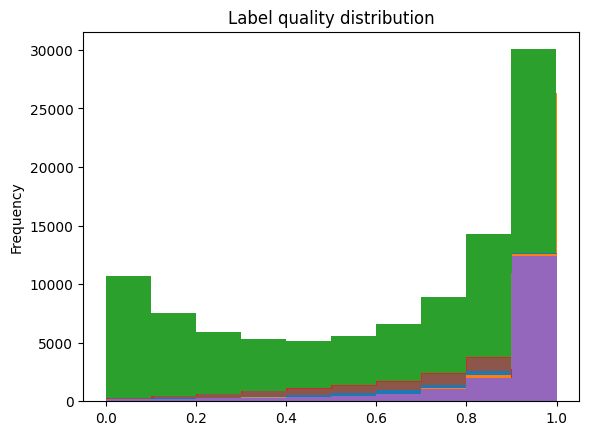

In [ ]:
# cleaning loop

df_cl_dic = {}
df_all_quality_dic = {}
for dataset_path in tqdm.notebook.tqdm(train_files_lst, desc="Dataset iterations"):

    df_cl, df_all_quality = clean_dataset(
        dataset_path=dataset_path, max_input_per_class=10_000,
        label_quality_thresh=0.5, min_output_per_class=10, max_output_per_class=10_000,
        verbose=True, health_summary=False, embedding_batch_size=64*4
    )
    df_cl_dic.update({dataset_path: df_cl})
    df_all_quality_dic.update({dataset_path: df_all_quality})

    # display sample of cleaned data
    display(df_cl.sample(frac=1.0, random_state=SEED_GLOBAL).head(10))

    # sleep to allow tables to display for inspection before next iter
    time.sleep(2)


### Overall cleaned data statistics

In [ ]:

# count text per class after cleaning
n_texts_per_class_cl = pd.Series(dtype=object)
for key_dataset_path, value_df_cl in df_cl_dic.items():
    n_texts_per_class_cl = pd.concat([n_texts_per_class_cl, value_df_cl.label_text.value_counts()])
n_texts_per_class_cl = pd.DataFrame(n_texts_per_class_cl, columns=["label_text"])

# text per class before cleaning
n_texts_per_class = pd.Series(dtype=object)
for key_dataset_path, value_df_all_quality in df_all_quality_dic.items():
    n_texts_per_class = pd.concat([n_texts_per_class, value_df_all_quality.given_label_text.value_counts()])
n_texts_per_class = pd.DataFrame(n_texts_per_class, columns=["label_text"])

df_n_texts_per_class = n_texts_per_class_cl.merge(
    n_texts_per_class, left_index=True, right_index=True, suffixes=["_cl", ""]
)

# statistics:
print("Total texts before cleaning: ", df_n_texts_per_class.label_text.sum())
print("Total texts after cleaning: ", df_n_texts_per_class.label_text_cl.sum())

print("\nClasses in total: ", len(df_n_texts_per_class.label_text_cl))
print("\nTasks in total: ", len(df_cl_dic.keys()))

print("\nLabel distribution after/before cleaning:\n", df_n_texts_per_class, "\n")


Total texts before cleaning:  963688
Total texts after cleaning:  818488

Classes in total:  308

Tasks in total:  25

Label distribution after/before cleaning:
                                          label_text_cl  label_text
Business                                          8629       10000
Business & Finance                                4165       10000
Computers & Internet                              8491       10000
Education & Reference                             4013       10000
Entertainment & Music                             6490       10000
...                                                ...         ...
weather_query                                      649         695
well_formed                                       6768        8256
why_verify_identity                                 71         121
wrong_amount_of_cash_received                      121         180
wrong_exchange_rate_for_cash_withdrawal             91         163

[308 rows x 2 columns] 



### Saving data to disk

In [ ]:
# save cleaned data to disk
save_to_disk = True

if save_to_disk:
    for key_dataset_path, value_df in df_cl_dic.items():
        key_dataset_path_cl = key_dataset_path.replace(".gzip", "").replace("datasets_standardized", "datasets_clean") + "_cl.gzip"
        value_df.to_parquet(key_dataset_path_cl, compression='gzip')
